In [2]:
!pip install pandas scikit-learn matplotlib seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ---------------------------------------- 60.9/60.9 kB 1.6 MB/s eta 0:00:00
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     ------------------- ------------------- 81.9/165.5 kB 2.3 MB/s eta 0:00:01
     -------------------------------------- 165.5/165.5 kB 2.5 MB/s eta 0:00:00
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:-

In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
raw_mail_data = pd.read_csv('spam.csv', encoding='ISO-8859-1')
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')

In [8]:
raw_mail_data.shape

(5572, 5)

In [9]:
raw_mail_data.columns


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [11]:
raw_mail_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
mail_data.loc[mail_data['v1']== 'spam','v1']= 0
mail_data.loc[mail_data['v1']==  'ham','v1'] = 1

In [13]:
x = mail_data['v2']
y = mail_data['v1']

In [14]:
x
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: object

In [15]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: object

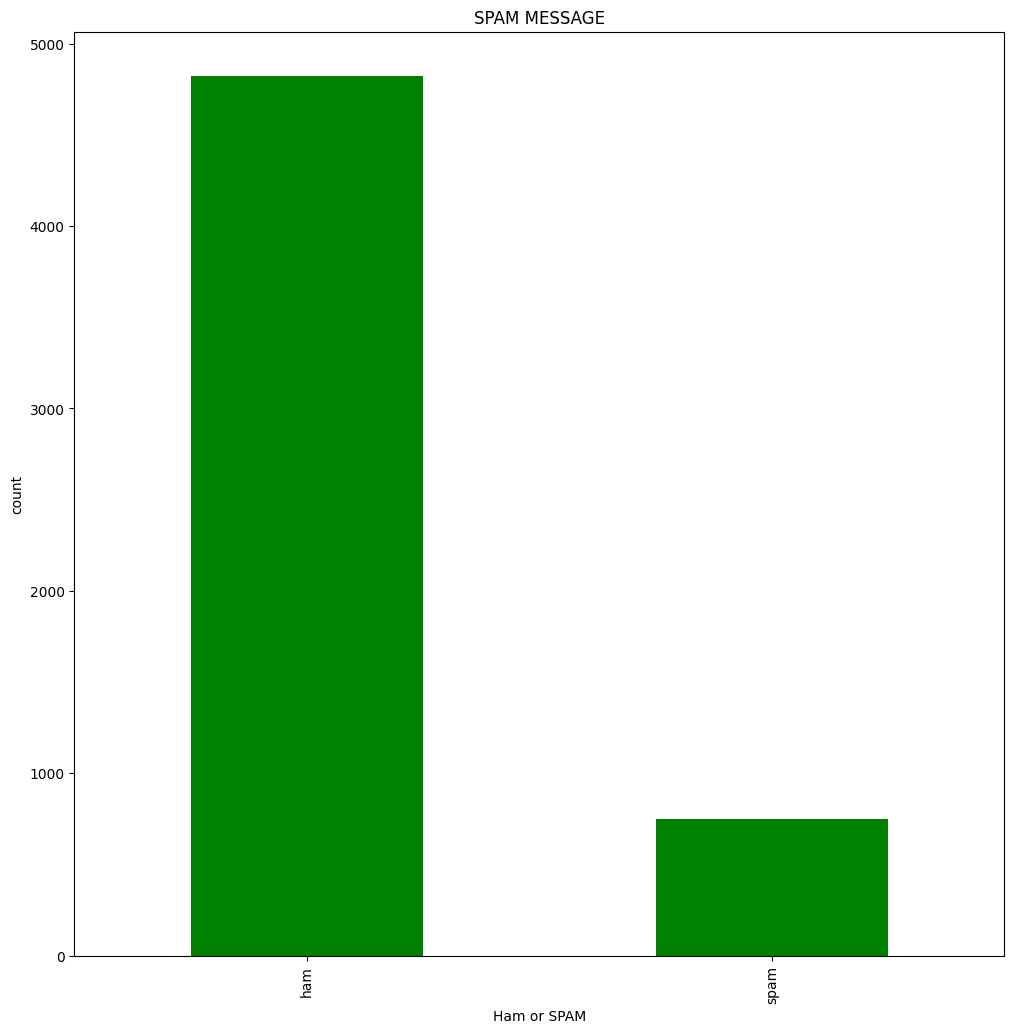

In [16]:
plt.figure(figsize = (12,12))
bank = raw_mail_data["v1"].value_counts()
bank.plot(kind="bar" ,color = 'GREEN')
plt.xlabel('Ham or SPAM')
plt.ylabel('count')
plt.title('SPAM MESSAGE')
plt.show()

In [18]:
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=0.2 , random_state=3)

Converting string into numbers 

In [19]:
feature_extr= TfidfVectorizer(min_df=1 , stop_words='english')
x_train_feature = feature_extr.fit_transform(x_train)
x_test_feature = feature_extr.transform(x_test) 

In [20]:
TfidfVectorizer(stop_words='english')

TfidfVectorizer(stop_words='english')

In [21]:
y_train= y_train.astype('int')
y_test= y_test.astype('int')

In [22]:
y_train

3075    1
1787    1
1614    1
4304    1
3266    1
       ..
789     1
968     1
1667    1
3321    1
1688    1
Name: v1, Length: 4457, dtype: int64

In [23]:
y_test

2632    1
454     0
983     1
1282    1
4610    1
       ..
4827    1
5291    1
3325    1
3561    1
1136    0
Name: v1, Length: 1115, dtype: int64

In [24]:
from sklearn.ensemble  import RandomForestClassifier
model = RandomForestClassifier()
model= model.fit(x_train_feature, y_train)

In [26]:
prediction_on_training =  model.predict(x_train_feature)
accuracy_score_checking_training= accuracy_score(y_train, prediction_on_training)*100
accuracy_score_checking_training

100.0

In [27]:
prediction_on_testing =  model.predict(x_test_feature)
accuracy_score_checking_test= accuracy_score(y_test, prediction_on_testing)*100
accuracy_score_checking_test

97.847533632287

In [29]:
content = "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, �1.50 to rcv"
input_mail=[content]
input_data_extraction= feature_extr.transform(input_mail)
prediction= model.predict(input_data_extraction)
if prediction[0]==1:
    print('message is HAM')
else: print('message is SPAM')

message is SPAM
